In [10]:
import numpy as np
import pandas as pd
import plotnine as pn
from rdot import ba_basic, ba_ib, ba_basic_torch
from rdot import distortions

### Hamming

In [11]:
x = np.array([0,1]) # Binary input
xhat = np.array([0,1]) # Binary reconstruction
p = 0.5 # P(X=1) = p
px = np.array([1-p, p])

# distortion matrix
dist_mat = distortions.hamming(*np.meshgrid(x, xhat))        

# Test many values of beta to sweep out a curve. 
betas = np.logspace(-5, 5, num=100)        

rd_values = [result[-2:] for result in ba_basic_torch.ba_iterate(px, dist_mat, betas)]

In [12]:
rd_values[20]

(1.9791947636349505e-07, 0.49973809608575587)

In [13]:
data = pd.DataFrame(rd_values, columns=["rate", "distortion"])
data

,rate,distortion
0,1.803357e-11,0.499997
1,2.871481e-11,0.499997
2,4.572209e-11,0.499996
3,7.280221e-11,0.499995
4,1.159219e-10,0.499994
...,...,...
95,1.000000e+00,0.000000
96,1.000000e+00,0.000000
97,1.000000e+00,0.000000
98,1.000000e+00,0.000000


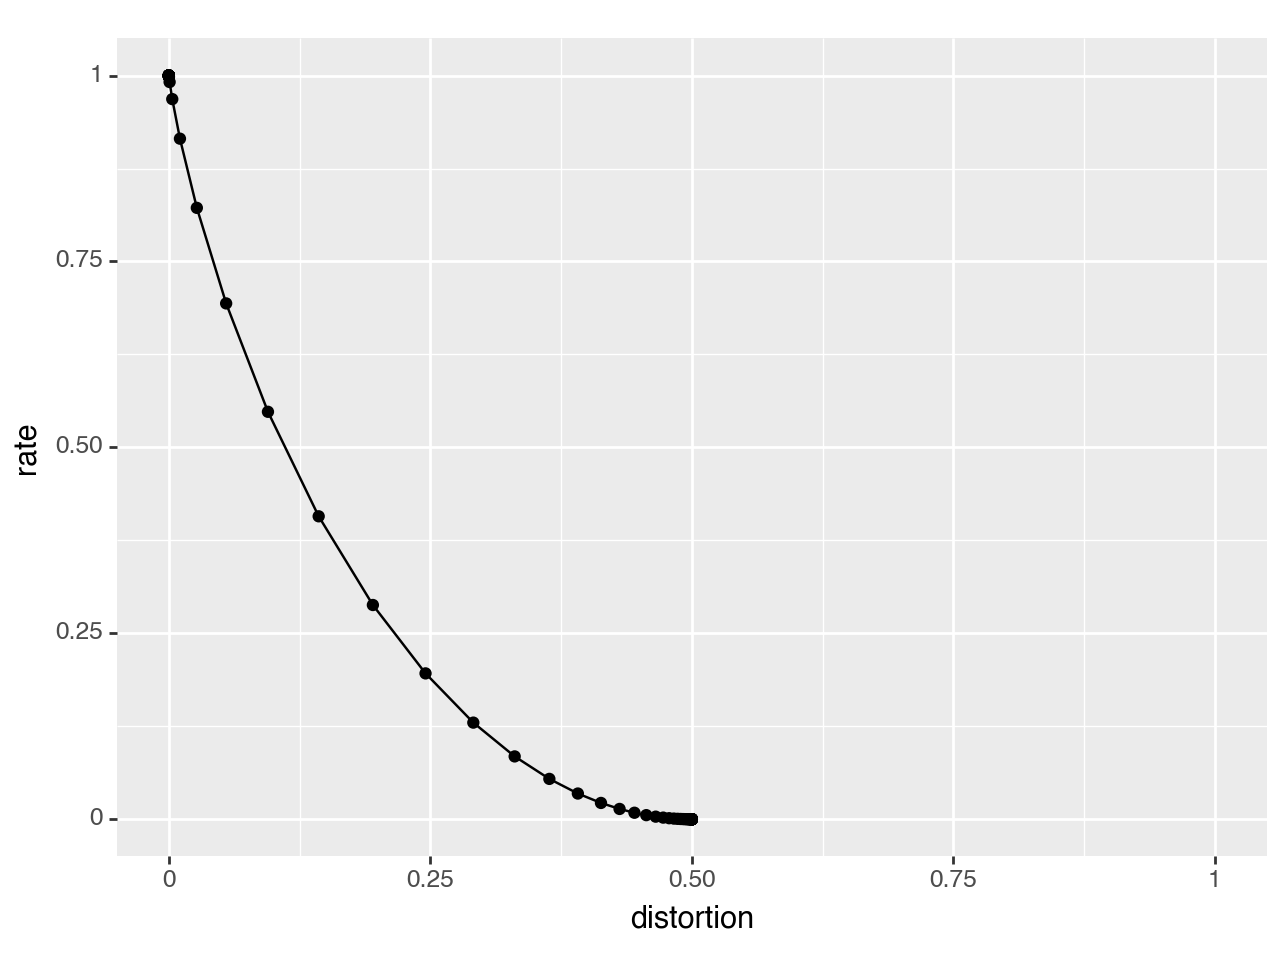

<Figure Size: (640 x 480)>

In [14]:
# Compare to figure 10.4 of Cover and Thomas
(
    pn.ggplot(data, pn.aes(x="distortion", y="rate"))
    + pn.geom_point()
    + pn.geom_line()
    + pn.xlim(0,1)
)

### Gaussian

In [15]:
# (truncated) Gaussian input with quadratic distortion
x = np.linspace(-5,5,1000) # source alphabet
xhat = np.linspace(-5,5,1000) # reconstruction alphabet
px = 1/(2*np.pi) * np.exp(-x ** 2 / 2) # source pdf
px /= px.sum() # guess we actually need this

dist_mat = distortions.quadratic(x, xhat)


# Test many values of beta to sweep out a curve. 
betas = np.logspace(-5, 10, num=100)        

rd_values = [result[-2:] for result in ba_basic_torch.ba_iterate(px, dist_mat, betas)]

In [16]:
data = pd.DataFrame(rd_values, columns=["rate", "distortion"])
data

,rate,distortion
0,2.406974e-09,9.341742
1,4.836057e-09,9.341369
2,9.716384e-09,9.340841
3,1.952136e-08,9.340093
4,3.921987e-08,9.339033
...,...,...
95,8.689497e+00,0.000000
96,8.689497e+00,0.000000
97,8.689497e+00,0.000000
98,8.689497e+00,0.000000


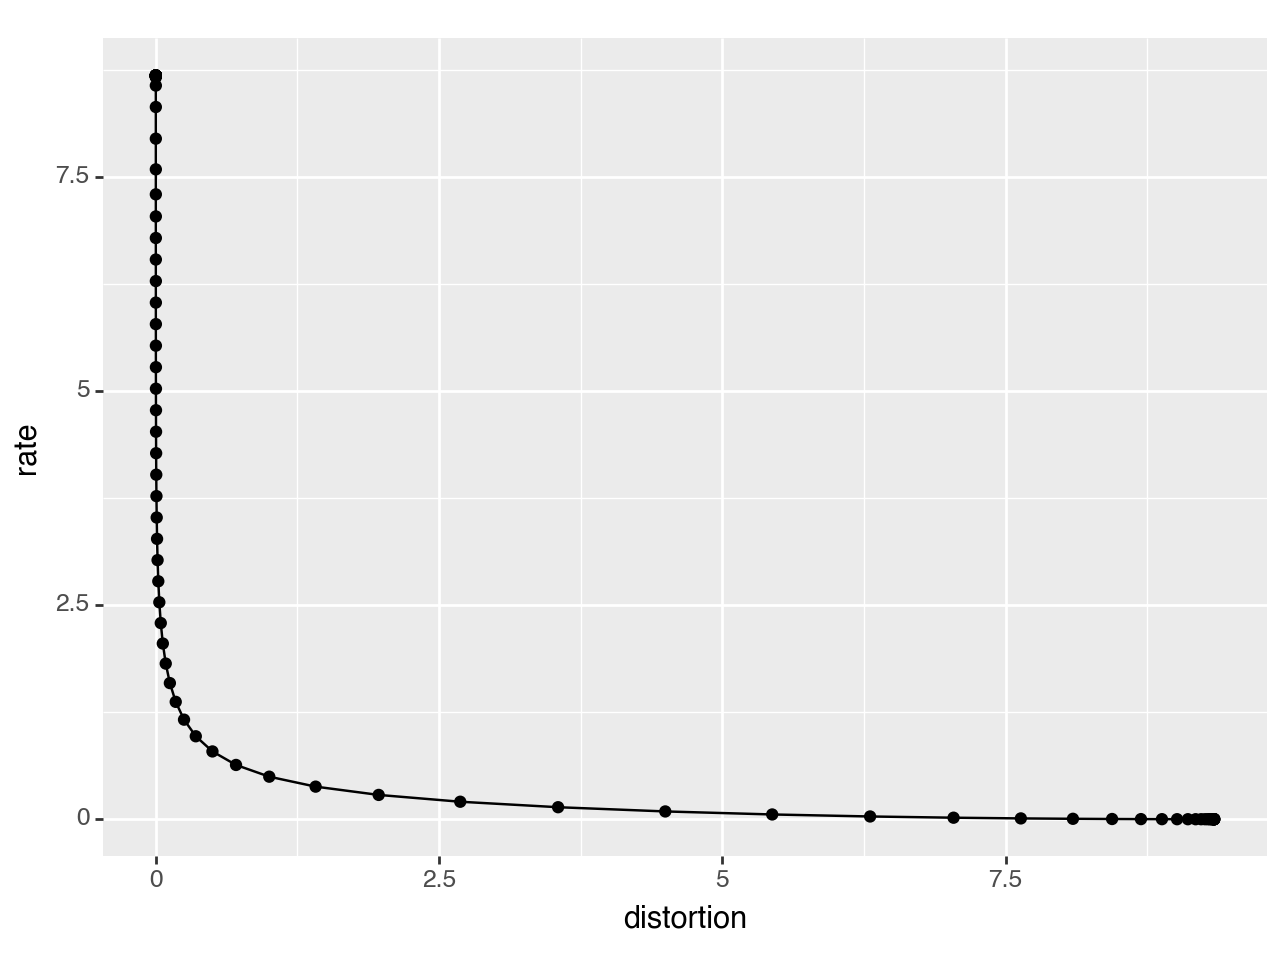

<Figure Size: (640 x 480)>

In [19]:
# Compare to figure 10.4 of Cover and Thomas
(
    pn.ggplot(data, pn.aes(x="distortion", y="rate"))
    + pn.geom_point()
    + pn.geom_line()
)

## IB

In [18]:
# define each p(y|x) to be a gaussian
py_x = np.array([[np.exp(-(i - j)**2) for j in range(10)] for i in range(10)])
py_x /= py_x.sum(axis=1)[:, None]
# get joint by multiplying by p(x)
px = np.full(py_x.shape[0], 1/10)
pxy = py_x * px

# Test many values of beta to sweep out a curve. 
betas = np.logspace(-5, 5, num=100)        

rd_values = [result[-2:] for result in ba_ib.ib_method(pxy, betas)]


0it [00:00, ?it/s]


NameError: name 'blahut_arimoto_ib' is not defined

In [ ]:
data = pd.DataFrame(rd_values, columns=["rate", "distortion"])
data

,rate,distortion
0,0.000000e+00,1.912026
1,-1.776357e-15,1.912026
2,0.000000e+00,1.912025
3,8.881784e-16,1.912025
4,0.000000e+00,1.912024
...,...,...
95,0.000000e+00,NaN
96,0.000000e+00,NaN
97,0.000000e+00,NaN
98,0.000000e+00,NaN


/Users/nathanielimel/miniforge3/envs/rdot/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 94 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/rdot/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 94 rows containing missing values.


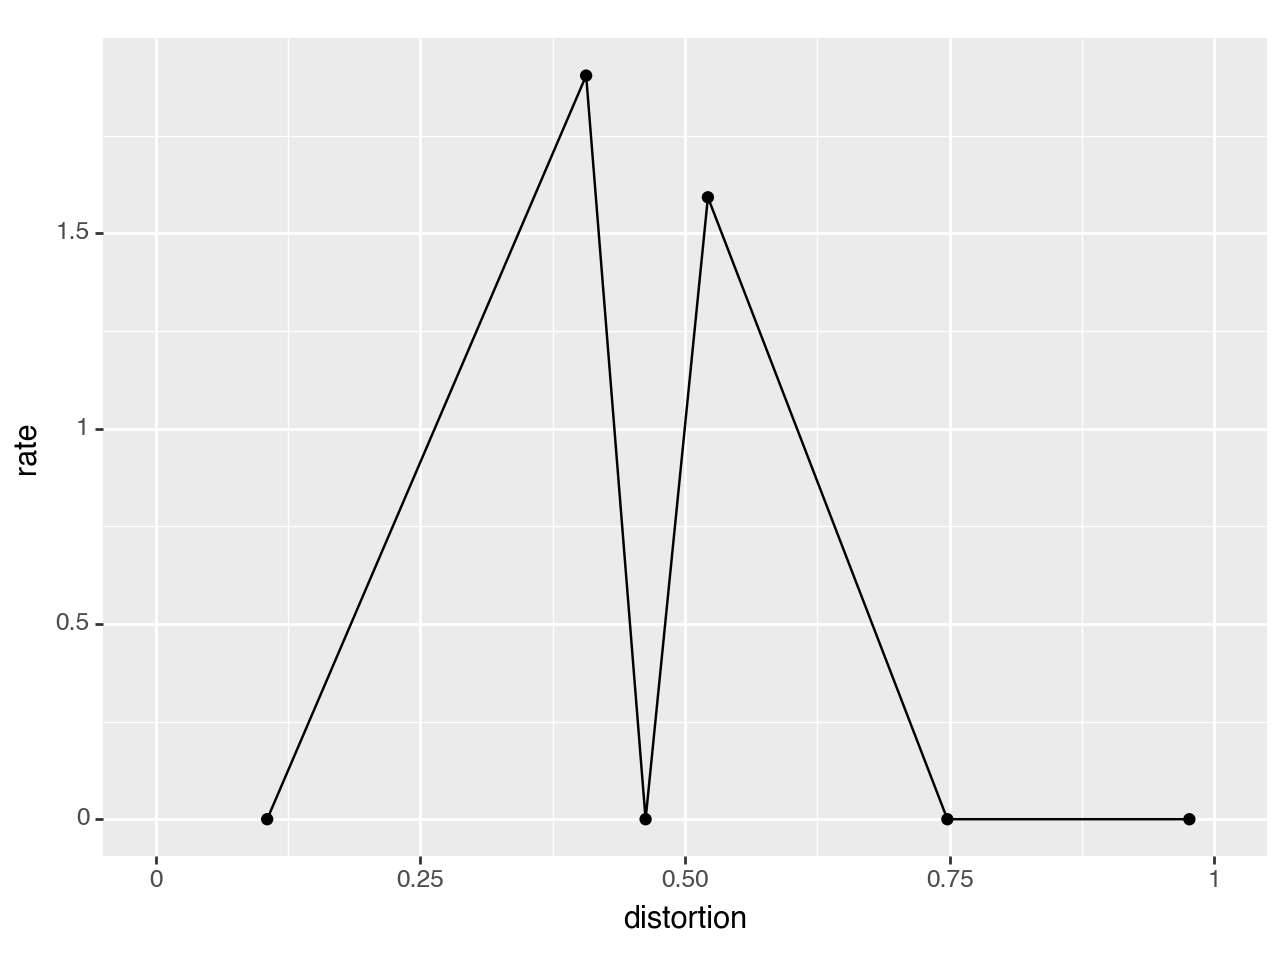

<Figure Size: (640 x 480)>

In [ ]:
(
    pn.ggplot(data, pn.aes(x="distortion", y="rate"))
    + pn.geom_point()
    + pn.geom_line()
    + pn.xlim(0,1)
)